# Project: Visual Recomendation Engine 
Approach:CNN


Submission Date-15-07-2020


Created by : Deepika sharan

In [8]:
## Libraries
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os # accessing directory structure

In [9]:
DATASET_PATH = "C:/Users/Deepi/OneDrive/Desktop/rec.dataset/"
print(os.listdir(DATASET_PATH))


['META_DATA.CSV', 'shoes']


In [10]:
## reading Dataset
df = pd.read_csv(DATASET_PATH + "META_DATA.CSV", nrows=77, error_bad_lines=False)
df['image'] = df.apply(lambda row: str(row['Id']) + ".jpg", axis=1)
df = df.reset_index(drop=True)
df.head(10)

,Unnamed: 0,Id,Category,SubCategory,HeelHeight,Closure,Gender,Material,ToeStyle,image
0,0,1,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,1.jpg
1,1,2,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,2.jpg
2,2,3,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,3.jpg
3,3,4,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,4.jpg
4,4,5,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,5.jpg
5,5,6,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,6.jpg
6,6,7,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,7.jpg
7,7,8,Slippers,Slipper Heels,1in 1 3/4in,Slip-On,Women,Faux Leather,Round Toe,8.jpg
8,8,9,FlatSandals,Flat,Under 1in,BuckleAnkle Strap,Women,LeatherSuede,Open Toe,9.jpg
9,9,10,FlatSandals,Flat,Under 1in,BuckleAnkle Strap,Women,LeatherSuede,Open Toe,10.jpg


In [11]:
import cv2
def plot_figures(figures, nrows = 1, ncols=1,figsize=(8, 8)):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    

def img_path(img):
    return DATASET_PATH+"/shoes/"+img

def load_image(img, resized_fac = 10):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized

In [12]:
##Sample Images

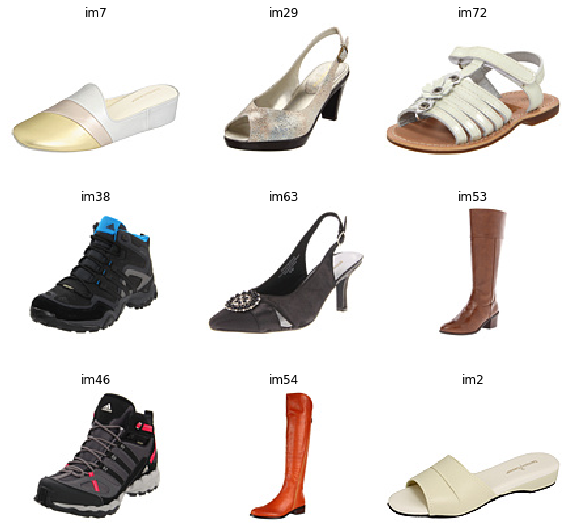

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.sample(9).iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 3, 3)

# Use Pre-Trained Model to Recommendation

In [14]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D

C:\Users\Deepi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Deepi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Deepi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Deepi\anaconda3\lib\site-packages\tensorboard\compat\tensorflow_stub\dtypes.

# ResNet50 as pre-trained model

In [15]:
# Input Shape
img_width, img_height, _ = 224, 224, 3 #load_image(df.iloc[0].image).shape

# Pre-Trained Model
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [16]:
def get_embedding(model, img_name):
    # Reshape
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)

Get item Embedding

In [17]:
emb = get_embedding(model, df.iloc[0].image)
emb.shape

(2048,)

# Showing image

(1020, 1360, 3)
[0.11456513 8.123931   1.7107662  ... 0.8054931  3.9383636  4.0910273 ]


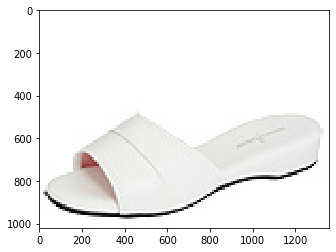

In [18]:

img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)

In [19]:
df.shape

(77, 10)

# Get Embedding for all items in dataset

In [20]:
%%time
#import swifter

# Parallel apply
df_sample      = df#.sample(10)
map_embeddings = df_sample['image'].apply(lambda img: get_embedding(model, img))
df_embs        = map_embeddings.apply(pd.Series)

print(df_embs.shape)
df_embs.head()

(77, 2048)
Wall time: 15.8 s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0.114565,8.123931,1.710766,0.0,1.430142,0.000000,9.233275,2.974027,0.957025,0.419809,...,2.765683,0.000000,0.000000,5.060406,14.935646,0.000000,8.328712,0.805493,3.938364,4.091027
1,1.692605,6.573217,2.452542,0.0,2.217685,0.905357,2.328152,7.903860,0.000000,0.445903,...,0.000000,0.006132,9.524734,3.253986,10.636246,0.963149,12.623408,0.709037,0.000000,1.138315
2,0.000000,6.637529,2.721575,0.0,0.000000,0.000000,7.922727,7.349520,0.226292,0.000000,...,0.000000,0.000000,3.740978,3.213233,15.099915,0.991620,13.453380,4.572718,3.957834,4.385491
3,0.925619,3.138461,5.162912,0.0,3.146803,0.000000,6.376070,2.985249,0.000000,0.992161,...,0.000000,0.899159,11.523617,3.581272,11.208046,0.000000,9.749735,2.636262,6.344053,12.726820
4,0.000000,4.896126,0.463447,0.0,1.557244,0.000000,4.402440,9.816447,0.359365,0.000000,...,0.000000,0.000000,6.845529,3.891856,11.927511,0.000000,19.131405,0.023968,0.469968,2.445343


In [21]:
df.shape

(77, 10)

# Calcule DIstance Matriz

In [22]:
from sklearn.metrics.pairwise import pairwise_distances

# Calcule DIstance Matriz
cosine = 1-pairwise_distances(df_embs, metric='cosine')
cosine[:4, :4]

array([[1.        , 0.79098594, 0.89531064, 0.8445923 ],
       [0.79098594, 0.9999994 , 0.8593255 , 0.85145646],
       [0.89531064, 0.8593255 , 0.99999976, 0.89090246],
       [0.8445923 , 0.85145646, 0.89090246, 0.99999976]], dtype=float32)

# cosine similarity score of image 

In [23]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get iamge recommendations based on the cosine similarity score of image 
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(cosine[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    Image_rec   = [i[0] for i in sim_scores]
    Image_Similarity_score    = [i[1] for i in sim_scores]
    
    return indices.iloc[Image_rec].index, Image_Similarity_score

get_recommender(76, df, top_n = 5)

(Int64Index([73, 75, 71, 72, 11], dtype='int64'),
 [0.85068405, 0.84167165, 0.82270104, 0.81931424, 0.81913316])

Image_Similarity_score 0 0.8539045
Image_Similarity_score 1 0.8315308
Image_Similarity_score 2 0.8242581
Image_Similarity_score 3 0.8197485
Image_Similarity_score 4 0.81810063


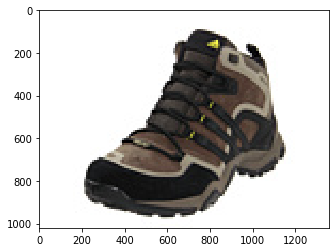

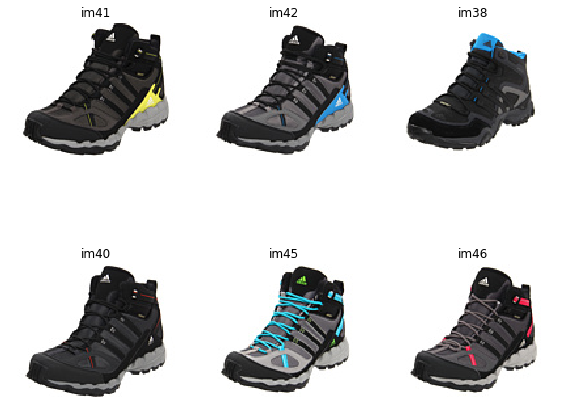

In [24]:
# Idx Item to Recommender
Image_ID = 39

# Recommendations
Image_rec, Image_Similarity_score = get_recommender(Image_ID, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[Image_ID].image), cv2.COLOR_BGR2RGB))
for i in range(0,5):
        print("Image_Similarity_score",i,Image_Similarity_score[i])
# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[Image_rec].iterrows()}
    
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)



# Euclidean distance 

In [25]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.pairwise import euclidean_distances
euclidean=1-euclidean_distances(df_embs, Y=None, Y_norm_squared=None, squared=False, X_norm_squared=None)
# Calcule DIstance Matriz
euclidean[:4, :4]

array([[   1.     , -188.15701, -134.13766, -166.26353],
       [-188.15701,    1.     , -156.14618, -163.02304],
       [-134.13766, -156.14618,    1.     , -140.50429],
       [-166.26353, -163.02304, -140.50429,    1.     ]], dtype=float32)

In [26]:
indices = pd.Series(range(len(df)), index=df.index)
indices

# Function that get image recommendations based on the euclidean similarity score of image 
def get_recommender(idx, df, top_n = 5):
    sim_idx    = indices[idx]
    sim_scores = list(enumerate(euclidean[sim_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]
    idx_rec    = [i[0] for i in sim_scores]
    idx_sim    = [i[1] for i in sim_scores]
    
    return indices.iloc[idx_rec].index, idx_sim

get_recommender(3, df, top_n = 5)

(Int64Index([4, 2, 5, 1, 0], dtype='int64'),
 [-140.25801, -140.50429, -161.01553, -163.02304, -166.26353])

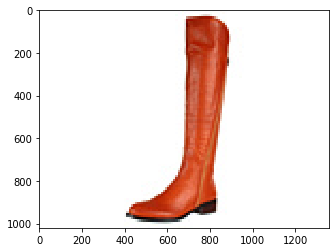

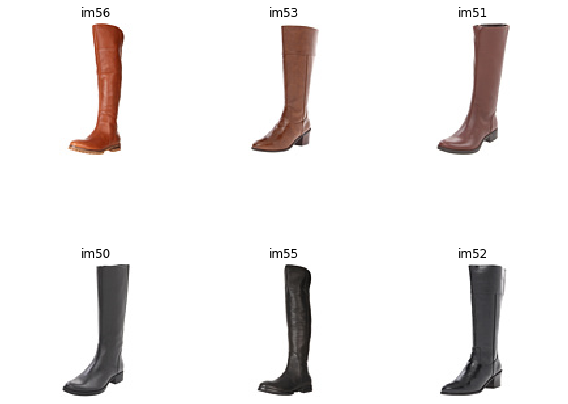

In [27]:
# Idx Item to Recommender
idx_ref = 54

# Recommendations
idx_rec, idx_sim = get_recommender(idx_ref, df, top_n = 6)

# Plot
#===================
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))

# generation of a dictionary of (title, images)
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[idx_rec].iterrows()}
# plot of the images in a figure, with 2 rows and 3 columns
plot_figures(figures, 2, 3)
